SMOTE
---
In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. 

In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or **very lesser recall**.

**SMOTE (synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# load the data set
data = pd.read_csv('creditcard.csv')

# print info about columns in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
# normalise the amount column
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [4]:
# drop Time and Amount columns as they are not relevant for prediction purpose
data = data.drop(['Time', 'Amount'], axis = 1)

# as you can see there are 492 fraud transactions.
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Class"].values
y = data.loc[:,"Class"].values

In [6]:
print("X:", X.shape)
print("y:", y.shape)

X: (284807, 29)
y: (284807,)


In [7]:
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


Now train the model **without handling the imbalanced class distribution**

In [8]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



The accuracy comes out to be 100% but did you notice something strange ? **The recall of the minority class in very less. It proves that the model is more biased towards majority class.** So, it proves that this is not the best model.

Now, we will apply SMOTE to handle imbalanced data and oserve the accuracy and recall results then.

In [9]:
#Using SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



In [10]:
# import SMOTE module from imblearn library
# !pip install imblearn

In [11]:
# !pip install --upgrade scikit-learn
!pip install imbalanced-learn==0.6
!pip install scikit-learn==0.22.1

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

TypeError: duplicate base class Sequence

**NOTE:** The newest version `0.7.0` of imbalanced-learn seems to have an undocumented dependency on scikit-learn `v0.23.1.` It would give you `AttributeError: 'SMOTE' object has no attribute '_validate_data'` if your scikit-learnis 0.22 or below.

This can be fixed by updating your sklearn to Version 0.23 or higher. This should be possible for you through:

`!pip install --upgrade scikit-learn`

*Don't forget to restart you kernel after updating the package.*

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

We have reduced the accuracy to 98% as compared to previous model but the recall value of minority class has also improved to 92 %. This is a good model compared to the previous one. Recall is great.

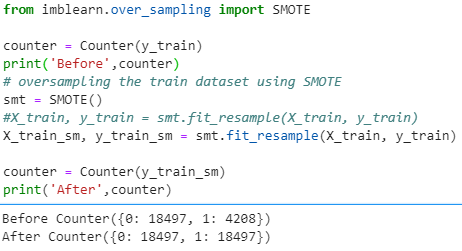